### **Stock market technical analysis using python**

#### Definition

Technical analysis is a trading discipline employed to evaluate investments and identify trading opportunities by analyzing statistical trends gathered from trading activity, such as price movement and volume. Unlike fundamental analysts, who attempt to evaluate a security's intrinsic value, technical analysts focus on patterns of price movements, trading signals and various other analytical charting tools to evaluate a security's strength or weakness.

#### Technical analysis is based on three main assumptions
The market discounts everything.
Many experts criticize technical analysis because it only considers price movements and ignores fundamental factors. Technical analysts believe that everything from a company’s fundamentals to broad market factors to market psychology are already priced into the stock. This removes the need to consider the factors separately before making an investment decision. The only thing remaining is the analysis of price movements, which technical analysts view as the product of supply and demand for a particular stock in the market.

#### Price moves in trends.
Technical analysts believe that prices move in short-, medium-, and long-term trend. In other words, a stock price is more likely to continue a past trend than move erratically. Most technical trading strategies are based on this assumption.

#### History tends to repeat itself.
Technical analysts believe that history tends to repeat itself. The repetitive nature of price movements is often attributed to market psychology, which tends to be very predictable based on emotions like fear or excitement. Technical analysis uses chart patterns to analyze these emotions and subsequent market movements to understand trends. While many form of technical analysis have been used for more than 100 years, they are still believed to be relevant because they illustrate patterns in price movements that often repeat themselves.

#### Some Technical Indicators

- Relative StochStrength Indicator (RSI)
- Stochastic (STOCH)mac
- Moving Average Convergence Divergence (MACD)
- Average WiDirectional Movement (ADX)
- Williams %R (WillR)
- Commodity Channel Index (CCI)
- Averagehig True Range (ATR)
- Ultimate Oscillator (ULTOSC)roc
- Rate of Change (ROC)
 and more . . .

In [ ]:
!pip install talib-binary

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import talib
import numpy as np
from datetime import datetime

In [ ]:
plt.rcParams['figure.figsize'] = [16, 12]

unvr stock case study

data overview

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/analisa-teknikal-saham/UNVR.csv')

# change datatype to date
df['DateTime'] = pd.to_datetime(df['Date'])

# select from first day in this year
df = df[df['DateTime'] >= datetime(2021, 5, 21)]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,DateTime
0,2021-05-21,27.020000,27.410000,26.920000,27.200001,27.200001,1169000,2021-05-21
1,2021-05-24,27.299999,27.420000,27.049999,27.280001,27.280001,1051500,2021-05-24
2,2021-05-25,27.420000,27.510000,26.990000,27.160000,27.160000,1279800,2021-05-25
3,2021-05-26,27.160000,27.309999,26.860001,27.000000,27.000000,1526600,2021-05-26
4,2021-05-27,27.260000,27.459999,26.980000,27.059999,27.059999,1122200,2021-05-27


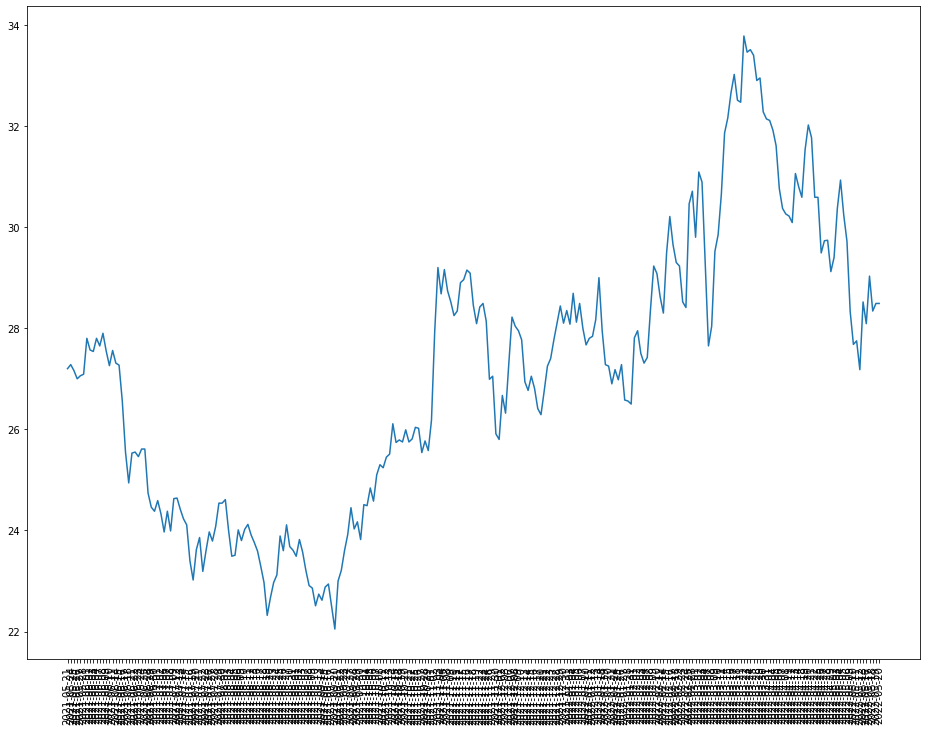

In [ ]:
plt.xticks(rotation=90)
plt.plot(df['Date'], df['Close'])
plt.show()

Simple Moving Average

A simple moving average (SMA) is an arithmetic moving average calculated by adding recent closing prices and then dividing that by the number of time periods in the calculation average. A simple, or arithmetic, moving average that is calculated by adding the closing price of the security for a number of time periods and then dividing this total by that same number of periods. Short-term averages respond quickly to changes in the price of the underlying, while long-term averages are slow to react.

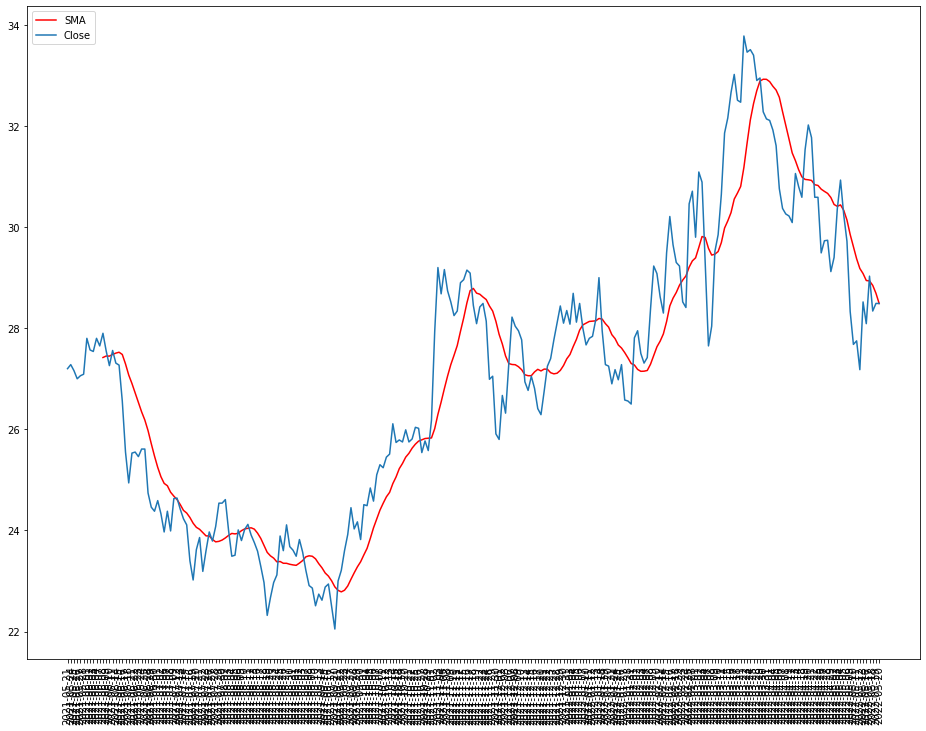

In [ ]:
# calculate moving average
ma = talib.SMA(df['Close'], timeperiod=12)

# rotate x labels
plt.xticks(rotation=90)

# plot for moving average
plt.plot(df['Date'], ma, label='SMA', color='r')

# plot for closing price
plt.plot(df['Date'], df['Close'], label='Close')

plt.legend(loc='upper left')
plt.show()

Relative Strength Index (RSI)

The relative strength index (RSI) is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in the price of a stock or other asset. The RSI is displayed as an oscillator (a line graph that moves between two extremes) and can have a reading from 0 to 100. The indicator was originally developed by J. Welles Wilder Jr. and introduced in his seminal 1978 book, New Concepts in Technical Trading Systems.

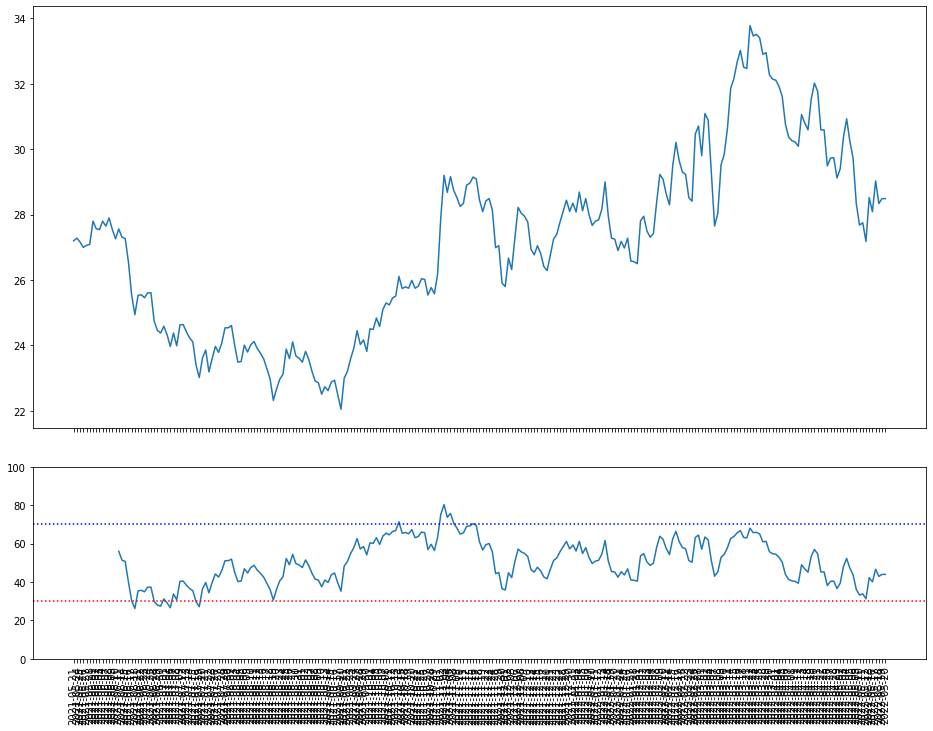

In [ ]:
# calculate rsi
output = talib.RSI(df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot rsi
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], output)
ax1.set_ylim(0, 100)
ax1.axhline(y=70, color='b', linestyle='dotted')
ax1.axhline(y=30, color='r', linestyle='dotted')

plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

Stoch

A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. The sensitivity of the oscillator to market movements is reducible by adjusting that time period or by taking a moving average of the result. It is used to generate overbought and oversold trading signals, utilizing a 0-100 bounded range of values.

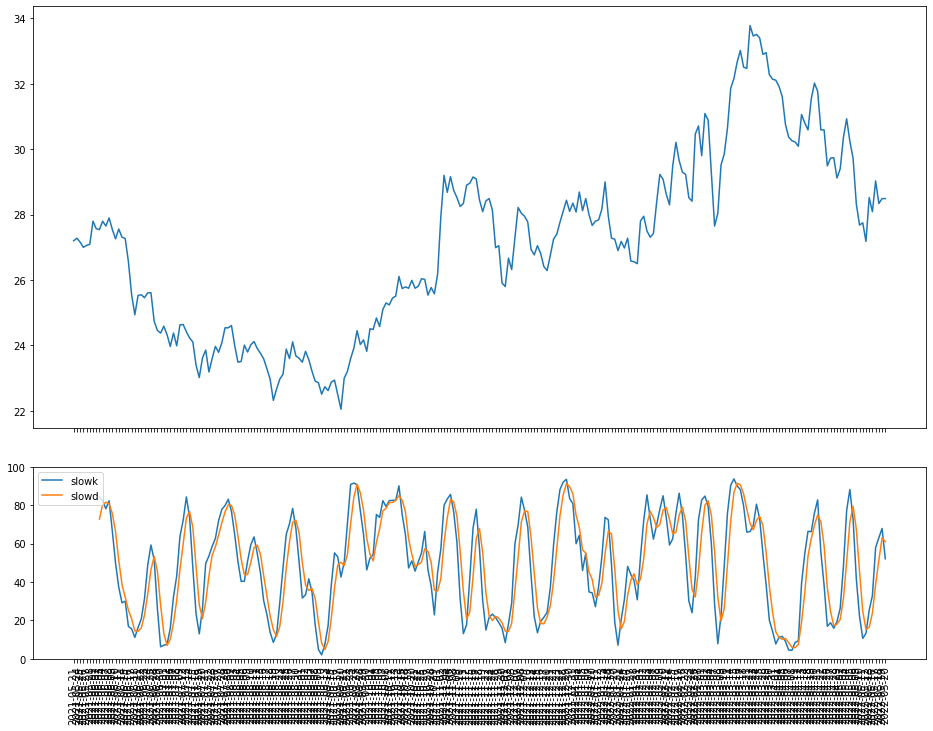

In [ ]:
# calculate stoch
slowk, slowd = talib.STOCH(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# Plot Stoch
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.set_ylim(0, 100) # scale y axis to 0 - 100
ax1.plot(df['Date'], slowk, label='slowk')
ax1.plot(df['Date'], slowd, label='slowd')
ax1.legend(loc='upper left')

plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

StochRSI

The Stochastic RSI (StochRSI) is an indicator used in technical analysis that ranges between zero and one (or zero and 100 on some charting platforms) and is created by applying the Stochastic oscillator formula to a set of relative strength index (RSI) values rather than to standard price data. Using RSI values within the Stochastic formula gives traders an idea of whether the current RSI value is overbought or oversold.

The StochRSI oscillator was developed to take advantage of both momentum indicators in order to create a more sensitive indicator that is attuned to a specific security's historical performance rather than a generalized analysis of price change.

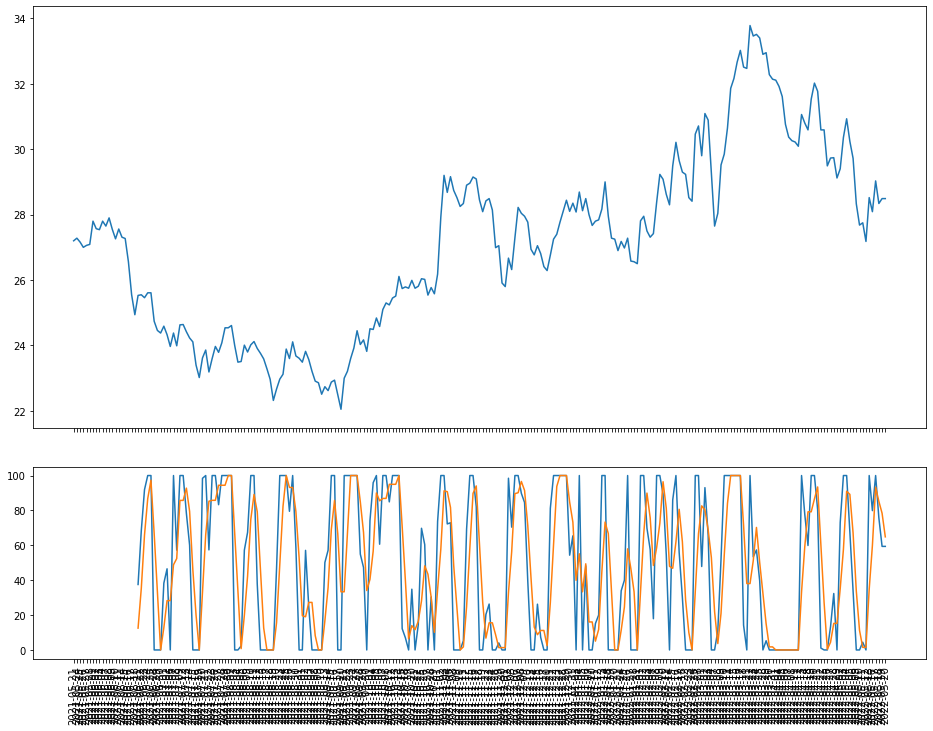

In [ ]:
# calculate stoch
fastk, fastd = talib.STOCHRSI(df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot stochrsi
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], fastk, label='fastk')
ax1.plot(df['Date'], fastd, label='fastd')

plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

MACD

Moving Average Convergence Divergence (MACD) is a trend-following momentum indicator that shows the relationship between two moving averages of a security’s price. The MACD is calculated by subtracting the 26-period Exponential Moving Average (EMA) from the 12-period EMA. The result of that calculation is the MACD line. A nine-day EMA of the MACD, called the "signal line," is then plotted on top of the MACD line, which can function as a trigger for buy and sell signals. Traders may buy the security when the MACD crosses above its signal line and sell - or short - the security when the MACD crosses below the signal line. Moving Average Convergence Divergence (MACD) indicators can be interpreted in several ways, but the more common methods are crossovers, divergences, and rapid rises/falls.

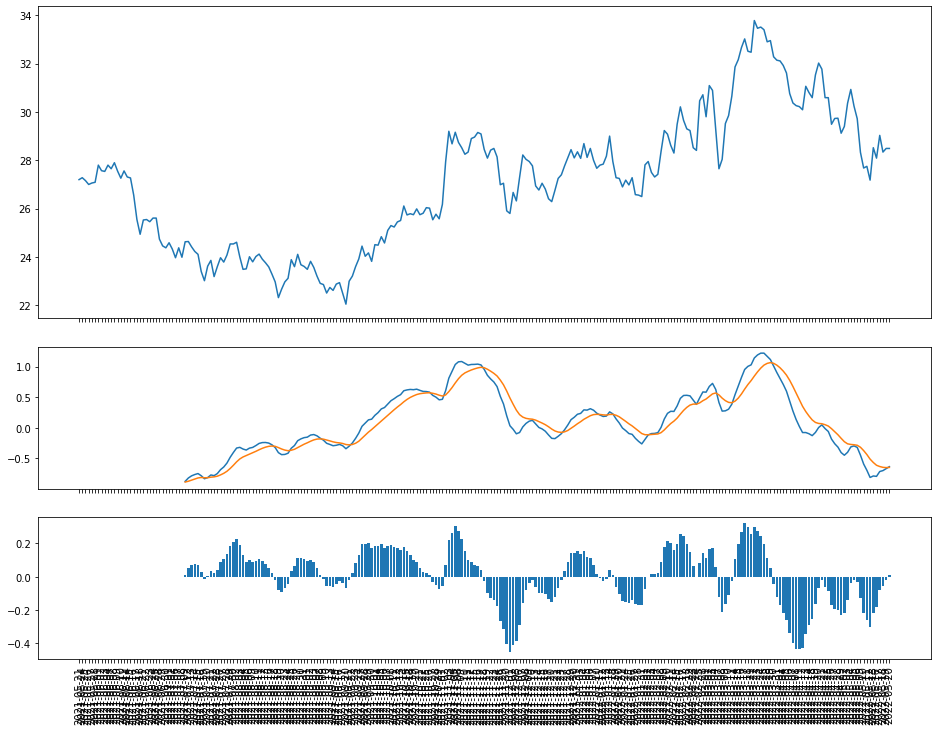

In [ ]:
# calculate stoch
macd, macdsignal, macdhist = talib.MACD(df['Close'])

# plot close
ax0 = plt.subplot2grid((4,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot macd, macdsignal
ax1 = plt.subplot2grid((4,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], macd, label='macd')
ax1.plot(df['Date'], macdsignal, label='macdsignal')

# plot histogram
ax2 = plt.subplot2grid((4,1), (3,0), sharex=ax0)
ax2.bar(df['Date'], macdhist, label='macdhist')

plt.setp(ax0.get_xticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

ADX

ADX is used to quantify trend strength. ADX calculations are based on a moving average of price range expansion over a given period of time. The default setting is 14 bars, although other time periods can be used. ADX can be used on any trading vehicle such as stocks, mutual funds, exchange-traded funds and futures.

ADX is plotted as a single line with values ranging from a low of zero to a high of 100. ADX is non-directional; it registers trend strength whether price is trending up or down. The indicator is usually plotted in the same window as the two directional movement indicator (DMI) lines, from which ADX is derived (Figure 1).

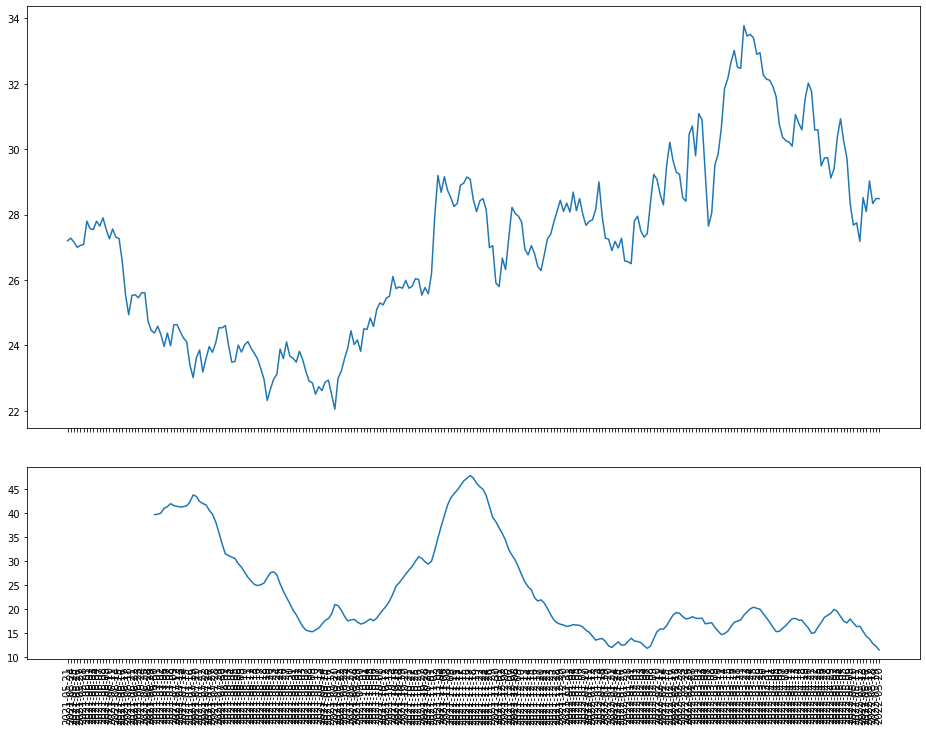

In [ ]:
real = talib.ADX(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot adx
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.setp(ax0.get_xticklabels(), visible=False)
plt.xticks(rotation=90)
plt.show()

Williams %R

Williams %R, also known as the Williams Percent Range, is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels. The Williams %R may be used to find entry and exit points in the market. The indicator is very similar to the Stochastic oscillator and is used in the same way. It was developed by Larry Williams and it compares a stock’s closing price to the high-low range over a specific period, typically 14 days or periods.

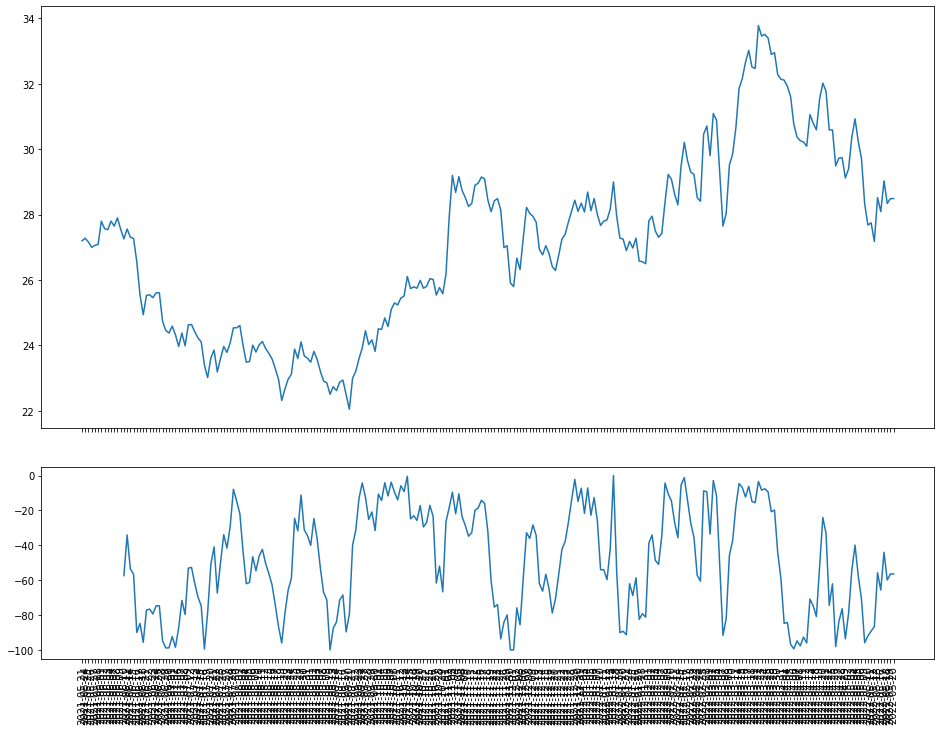

In [ ]:
real = talib.WILLR(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot williams
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.xticks(rotation=90)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.show()

CCI

Developed by Donald Lambert, the Commodity Channel Index​ (CCI) is a momentum-based oscillator used to help determine when an investment vehicle is reaching a condition of being overbought or oversold. It is also used to assess price trend direction and strength. This information allows traders to determine if they want to enter or exit a trade, refrain from taking a trade, or add to an existing position. In this way, the indicator can be used to provide trade signals when it acts in a certain way.

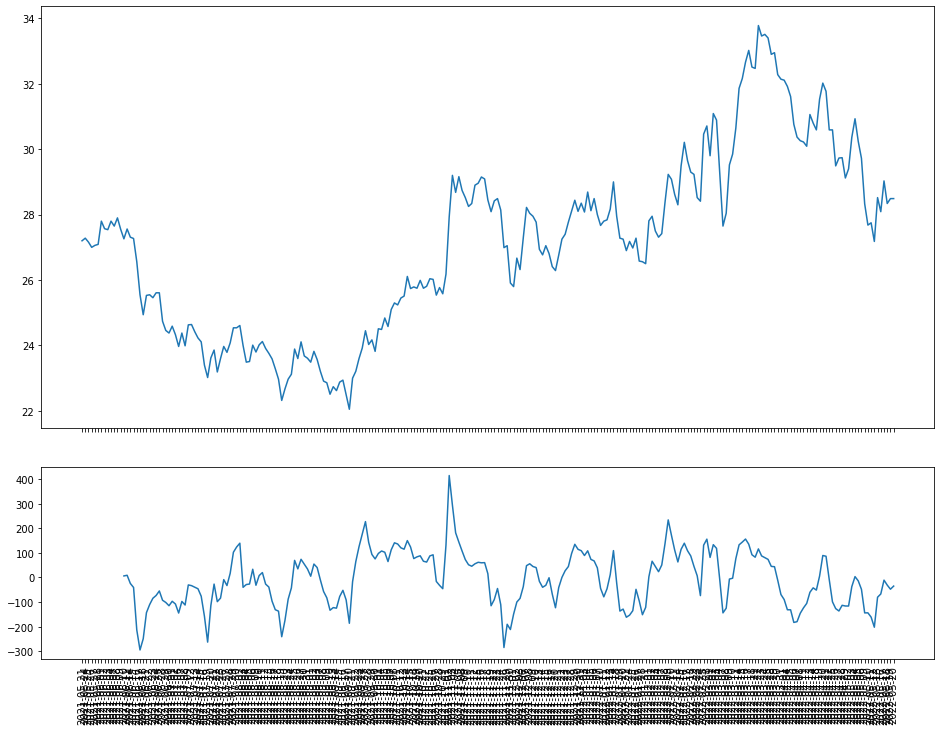

In [ ]:
real = talib.CCI(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot CCI
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.xticks(rotation=90)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.show()

ULTOSC

The Ultimate Oscillator is a technical indicator that was developed by Larry Williams in 1976 to measure the price momentum of an asset across multiple timeframes. By using the weighted average of three different timeframes the indicator has less volatility and fewer trade signals compared to other oscillators that rely on a single timeframe. Buy and sell signals are generated following divergences. The Ultimately Oscillator generates fewer divergence signals than other oscillators due to its multi-timeframe construction.

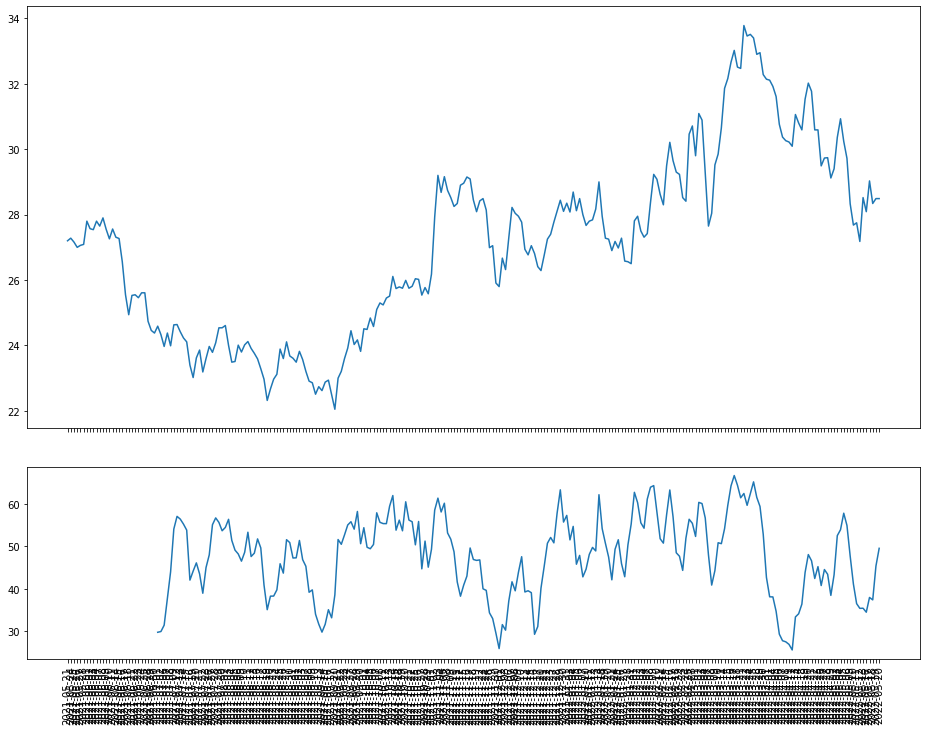

In [ ]:
real = talib.ULTOSC(df['High'], df['Low'], df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot ultosc
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.xticks(rotation=90)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.show()

ROC

The Price Rate of Change (ROC) is a momentum-based technical indicator that measures the percentage change in price between the current price and the price a certain number of periods ago. The ROC indicator is plotted against zero, with the indicator moving upwards into positive territory if price changes are to the upside, and moving into negative territory if price changes are to the downside.

The indicator can be used to spot divergences, overbought and oversold conditions, and centerline crossovers.

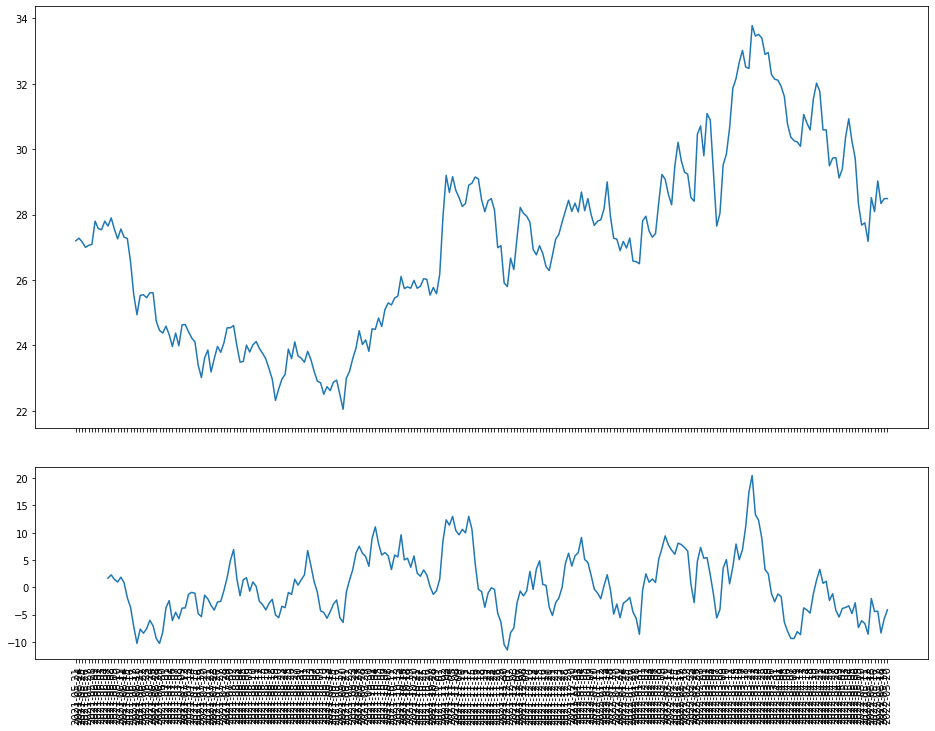

In [ ]:
real = talib.ROC(df['Close'])

# plot close
ax0 = plt.subplot2grid((3,1), (0,0), rowspan=2)
ax0.plot(df['Date'], df['Close'])

# plot roc
ax1 = plt.subplot2grid((3,1), (2,0), sharex=ax0)
ax1.plot(df['Date'], real)

plt.xticks(rotation=90)
plt.setp(ax0.get_xticklabels(), visible=False)
plt.show()